<a href="https://colab.research.google.com/github/ammarwesal/house_prediction_model/blob/main/house_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/MACHINE LEARMING/practice/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
from sklearn.model_selection import train_test_split

# Apply one-hot encoding to the entire dataset before splitting
data_encoded = pd.get_dummies(data, columns=['ocean_proximity'], dtype=int)

# X = data_encoded.drop('median_house_value', axis=1) # Commented out as X will be created later
# y = data_encoded['median_house_value'] # Commented out as y will be created later

# Split the data after encoding
train_data, test_data = train_test_split(data_encoded, test_size=0.2, random_state=42) # Added random_state for reproducibility

In [ ]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0


In [ ]:
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
# Join X_train and y_train to create the training data DataFrame
train_data = X_train.join(y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
10204,-117.93,33.87,52.0,950.0,229.0,429.0,185.0,2.3150,1,0,0,0,0,182100.0
9794,-121.77,36.53,18.0,2321.0,358.0,803.0,341.0,10.1854,1,0,0,0,0,426000.0
58,-122.28,37.82,52.0,1387.0,341.0,1074.0,304.0,1.2171,0,0,0,1,0,80300.0
7356,-118.16,33.96,24.0,1635.0,507.0,2480.0,481.0,2.4432,1,0,0,0,0,187500.0
5545,-118.40,33.97,37.0,1364.0,248.0,494.0,242.0,4.6364,1,0,0,0,0,456300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,-118.20,34.03,37.0,1583.0,392.0,1776.0,377.0,2.7266,1,0,0,0,0,140800.0
1060,-121.88,39.74,12.0,14631.0,3298.0,7517.0,3262.0,1.6785,0,1,0,0,0,153100.0
9714,-121.68,36.67,26.0,5745.0,1017.0,2780.0,996.0,5.0000,1,0,0,0,0,202300.0
19127,-122.67,38.25,32.0,1333.0,235.0,660.0,206.0,4.0729,1,0,0,0,0,288500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'ocean_proximity_<1H OCEAN'}>,
        <Axes: title={'center': 'ocean_proximity_INLAND'}>,
        <Axes: title={'center': 'ocean_proximity_ISLAND'}>,
        <Axes: title={'center': 'ocean_proximity_NEAR BAY'}>],
       [<Axes: title={'center': 'ocean_proximity_NEAR OCEAN'}>,
        <Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

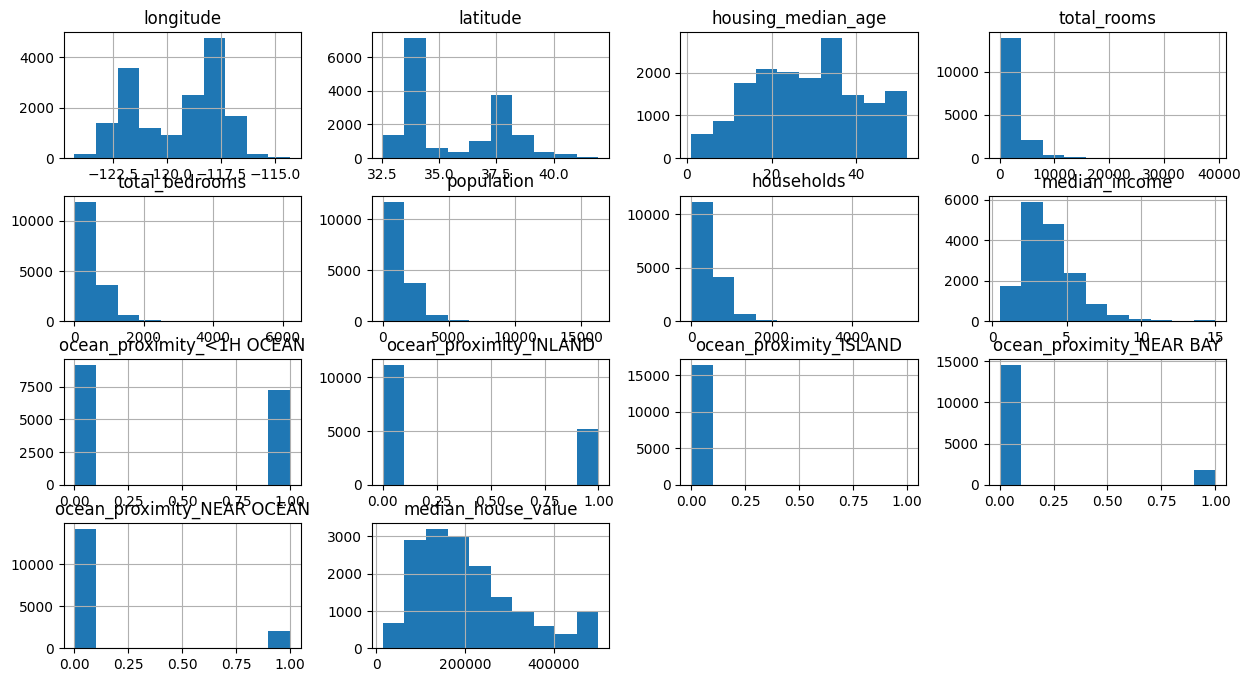

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
longitude,1.000000,-0.923319,-0.112494,0.046720,0.071906,0.106515,0.059454,-0.020469,0.320225,-0.051186,0.008466,-0.477766,0.046082,-0.050631
latitude,-0.923319,1.000000,0.014067,-0.038412,-0.069179,-0.116794,-0.075539,-0.076873,-0.447917,0.349437,-0.014582,0.360590,-0.161992,-0.142545
housing_median_age,-0.112494,0.014067,1.000000,-0.361674,-0.321374,-0.306532,-0.304015,-0.123565,0.044105,-0.238150,0.016150,0.256958,0.023763,0.106712
total_rooms,0.046720,-0.038412,-0.361674,1.000000,0.929880,0.866310,0.917634,0.203571,-0.003583,0.024482,-0.006017,-0.023354,-0.006577,0.137347
total_bedrooms,0.071906,-0.069179,-0.321374,0.929880,1.000000,0.887537,0.979183,-0.004523,0.018885,-0.008412,-0.002575,-0.021054,0.003652,0.051225
population,0.106515,-0.116794,-0.306532,0.866310,0.887537,1.000000,0.917465,0.009845,0.075836,-0.023710,-0.008647,-0.063845,-0.019063,-0.020730
households,0.059454,-0.075539,-0.304015,0.917634,0.979183,0.917465,1.000000,0.017927,0.042462,-0.040866,-0.006868,-0.012289,0.005814,0.067592
median_income,-0.020469,-0.076873,-0.123565,0.203571,-0.004523,0.009845,0.017927,1.000000,0.167982,-0.236772,-0.009298,0.059401,0.025180,0.690757
ocean_proximity_<1H OCEAN,0.320225,-0.447917,0.044105,-0.003583,0.018885,0.075836,0.042462,0.167982,1.000000,-0.608664,-0.012036,-0.315325,-0.339398,0.258414
ocean_proximity_INLAND,-0.051186,0.349437,-0.238150,0.024482,-0.008412,-0.023710,-0.040866,-0.236772,-0.608664,1.000000,-0.009283,-0.243196,-0.261763,-0.486656


<Axes: >

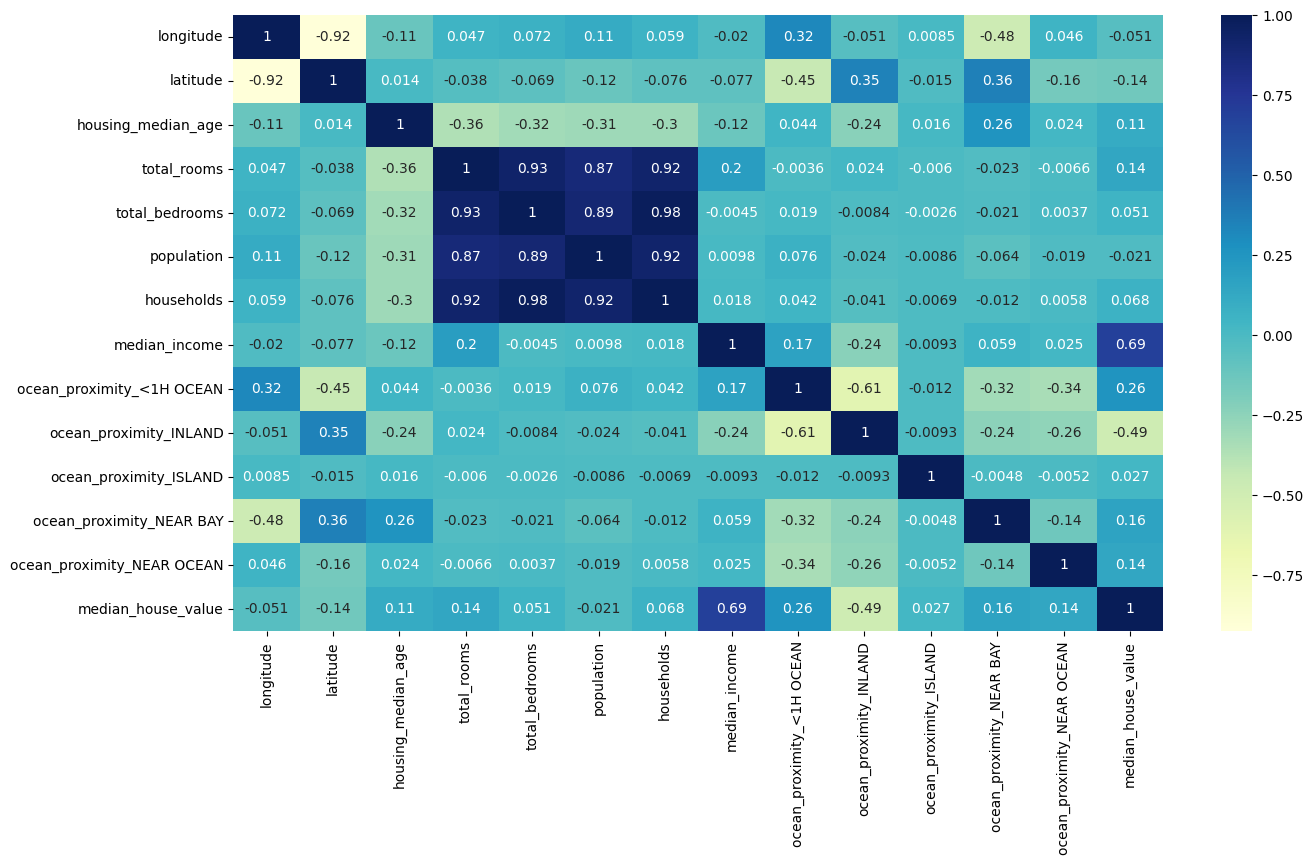

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [ ]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
10204,-117.93,33.87,52.0,950.0,229.0,429.0,185.0,2.3150,1,0,0,0,0,182100.0
9794,-121.77,36.53,18.0,2321.0,358.0,803.0,341.0,10.1854,1,0,0,0,0,426000.0
58,-122.28,37.82,52.0,1387.0,341.0,1074.0,304.0,1.2171,0,0,0,1,0,80300.0
7356,-118.16,33.96,24.0,1635.0,507.0,2480.0,481.0,2.4432,1,0,0,0,0,187500.0
5545,-118.40,33.97,37.0,1364.0,248.0,494.0,242.0,4.6364,1,0,0,0,0,456300.0


In [ ]:
# Apply transformations to the training data
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'ocean_proximity_<1H OCEAN'}>,
        <Axes: title={'center': 'ocean_proximity_INLAND'}>,
        <Axes: title={'center': 'ocean_proximity_ISLAND'}>,
        <Axes: title={'center': 'ocean_proximity_NEAR BAY'}>],
       [<Axes: title={'center': 'ocean_proximity_NEAR OCEAN'}>,
        <Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

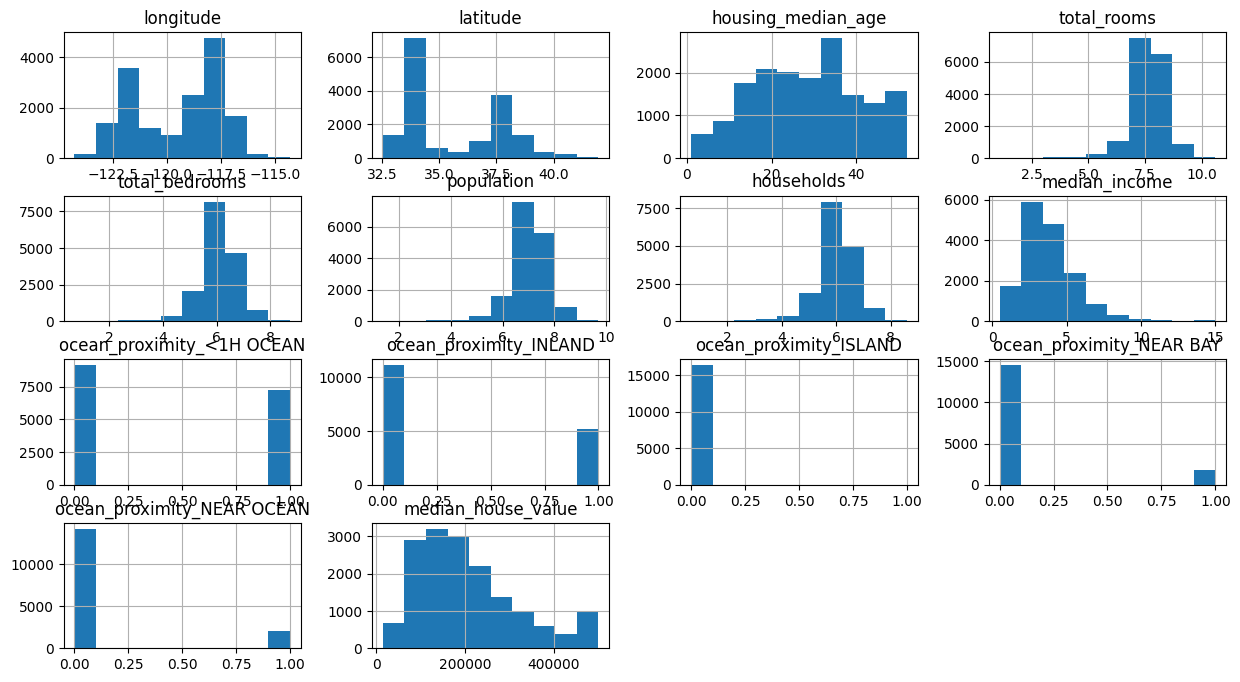

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
# Feature engineering for training data
train_data['bedrooms_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

In [ ]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value,bedrooms_ratio,household_rooms
10204,-117.93,33.87,52.0,6.857514,5.438079,6.063785,5.225747,2.3150,1,0,0,0,0,182100.0,0.793010,1.312255
9794,-121.77,36.53,18.0,7.750184,5.883322,6.689599,5.834811,10.1854,1,0,0,0,0,426000.0,0.759120,1.328267
58,-122.28,37.82,52.0,7.235619,5.834811,6.980076,5.720312,1.2171,0,0,0,1,0,80300.0,0.806401,1.264899
7356,-118.16,33.96,24.0,7.400010,6.230481,7.816417,6.177944,2.4432,1,0,0,0,0,187500.0,0.841956,1.197811
5545,-118.40,33.97,37.0,7.218910,5.517453,6.204558,5.493061,4.6364,1,0,0,0,0,456300.0,0.764306,1.314187


In [ ]:
from sklearn.linear_model import LinearRegression

# X_train already has ocean_proximity encoded and is ready
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value'] # This line is now needed

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Join X_test and y_test to create the test data DataFrame
test_data = X_test.join(y_test)

# Apply transformations to the test data
test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['households']=np.log(test_data['households']+1)
test_data['population']=np.log(test_data['population']+1)

# Feature engineering for test data
test_data['bedrooms_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']


In [ ]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [ ]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value,bedrooms_ratio,household_rooms
10420,-117.61,33.41,35.0,7.846590,6.003887,6.853299,5.991465,6.1557,0,0,0,0,1,402900.0,0.765159,1.309628
12697,-121.42,38.60,36.0,7.191429,5.347108,6.419995,5.442418,3.8672,0,1,0,0,0,111400.0,0.743539,1.321367
11627,-118.07,33.81,22.0,7.905442,5.866468,7.174724,5.910797,8.5407,1,0,0,0,0,398800.0,0.742080,1.337458
19675,-121.62,39.16,7.0,8.407602,6.655440,7.728416,6.643790,3.8090,0,1,0,0,0,110700.0,0.791598,1.265483
8163,-118.13,33.81,34.0,7.551712,5.840642,6.834109,5.857933,5.3950,1,0,0,0,0,241900.0,0.773420,1.289143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,-122.28,37.91,48.0,7.642044,5.700444,6.530878,5.659482,7.3089,0,0,0,1,0,331200.0,0.745932,1.350308
742,-122.13,37.67,42.0,8.186743,6.556778,7.393878,6.501290,3.2434,0,0,0,1,0,179900.0,0.800902,1.259249
14422,-117.23,32.80,27.0,7.168580,5.874931,6.655440,5.823046,2.4643,0,0,0,0,1,244400.0,0.819539,1.231070
13382,-117.59,34.13,10.0,9.916601,8.272826,9.181632,8.228177,3.8505,0,1,0,0,0,169600.0,0.834240,1.205200


In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value,bedrooms_ratio,household_rooms
10204,-117.93,33.87,52.0,6.857514,5.438079,6.063785,5.225747,2.3150,1,0,0,0,0,182100.0,0.793010,1.312255
9794,-121.77,36.53,18.0,7.750184,5.883322,6.689599,5.834811,10.1854,1,0,0,0,0,426000.0,0.759120,1.328267
58,-122.28,37.82,52.0,7.235619,5.834811,6.980076,5.720312,1.2171,0,0,0,1,0,80300.0,0.806401,1.264899
7356,-118.16,33.96,24.0,7.400010,6.230481,7.816417,6.177944,2.4432,1,0,0,0,0,187500.0,0.841956,1.197811
5545,-118.40,33.97,37.0,7.218910,5.517453,6.204558,5.493061,4.6364,1,0,0,0,0,456300.0,0.764306,1.314187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,-118.20,34.03,37.0,7.367709,5.973810,7.482682,5.934894,2.7266,1,0,0,0,0,140800.0,0.810810,1.241422
1060,-121.88,39.74,12.0,9.590966,8.101375,8.925055,8.090402,1.6785,0,1,0,0,0,153100.0,0.844688,1.185475
9714,-121.68,36.67,26.0,8.656259,6.925595,7.930566,6.904751,5.0000,1,0,0,0,0,202300.0,0.800068,1.253667
19127,-122.67,38.25,32.0,7.195937,5.463832,6.493754,5.332719,4.0729,1,0,0,0,0,288500.0,0.759294,1.349394


In [ ]:
# Predict on the test data
X_test_processed = test_data.drop('median_house_value', axis=1) # Drop the target variable from the test features
y_pred = reg.predict(X_test_processed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE as well

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 4802173538.604137
Root Mean Squared Error (RMSE): 69297.71669113015


# Task
Apply a Random Forest Regressor model to the training data, evaluate its performance on the test data using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE), and compare its performance to the previously used Linear Regression model.

## Import randomforestregressor

### Subtask:
Import the necessary class from sklearn.


**Reasoning**:
Import the necessary classes and functions for the Random Forest Regressor model and evaluation.



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Train the model

### Subtask:
Instantiate and train the RandomForestRegressor model using the training data.


**Reasoning**:
Instantiate and train the RandomForestRegressor model using the training data.



In [ ]:
# Instantiate a RandomForestRegressor model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Make predictions

### Subtask:
Use the trained model to make predictions on the test data.


**Reasoning**:
Use the trained Random Forest Regressor model to make predictions on the preprocessed test data.



In [ ]:
y_pred_rf = rf_reg.predict(X_test_processed)

## Evaluate the model

### Subtask:
Calculate and print the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) of the Random Forest model on the test set.


**Reasoning**:
Calculate the MSE and RMSE for the Random Forest model predictions and print the results.



In [ ]:
# Calculate MSE for Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate RMSE for Random Forest model
rmse_rf = np.sqrt(mse_rf)

# Print the evaluation metrics
print(f"Random Forest Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest Root Mean Squared Error (RMSE): {rmse_rf}")

Random Forest Mean Squared Error (MSE): 2376056231.2846966
Random Forest Root Mean Squared Error (RMSE): 48744.80722379253


## Compare models

### Subtask:
Compare the performance of the Random Forest model with the Linear Regression model.


**Reasoning**:
Print the MSE and RMSE for both models and compare them.



In [ ]:
print("Linear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print("\nRandom Forest Model Performance:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")

print("\nComparison:")
if rmse_rf < rmse:
    print("The Random Forest model performed better than the Linear Regression model (lower RMSE).")
else:
    print("The Linear Regression model performed better than or equal to the Random Forest model (lower or equal RMSE).")

Linear Regression Model Performance:
Mean Squared Error (MSE): 4802173538.604137
Root Mean Squared Error (RMSE): 69297.71669113015

Random Forest Model Performance:
Mean Squared Error (MSE): 2376056231.2846966
Root Mean Squared Error (RMSE): 48744.80722379253

Comparison:
The Random Forest model performed better than the Linear Regression model (lower RMSE).


## Summary:

### Data Analysis Key Findings

*   The Mean Squared Error (MSE) for the Random Forest model on the test set is approximately 2,376,056,231.28.
*   The Root Mean Squared Error (RMSE) for the Random Forest model on the test set is approximately 48,744.81.
*   The Random Forest model achieved lower MSE (2376056231.28) and RMSE (48744.81) on the test set compared to the Linear Regression model (MSE: 4802173538.60, RMSE: 69297.72).

### Insights or Next Steps

*   The Random Forest model demonstrates improved predictive performance over the Linear Regression model for this dataset.
*   Further tuning of the Random Forest model hyperparameters (e.g., `n_estimators`, `max_depth`) could potentially lead to even better performance.


# Task
Apply Random Forest Regression to the dataset, evaluate its performance using MSE and RMSE, compare it with the previously applied Linear Regression model, and visualize the performance comparison using a bar plot.

## Visualize performance

### Subtask:
Create a bar plot to visually compare the MSE and RMSE of the Linear Regression and Random Forest models.


**Reasoning**:
Create a bar plot to compare the MSE and RMSE of the two models.



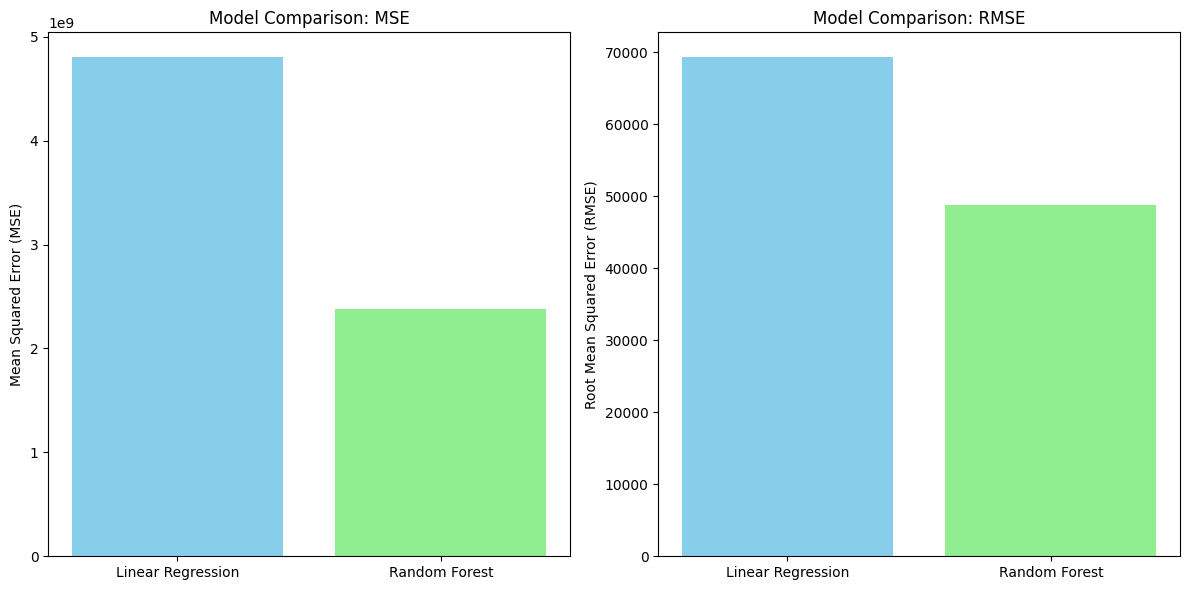

In [ ]:
# Create lists for model names and their performance metrics
model_names = ['Linear Regression', 'Random Forest']
mse_values = [mse, mse_rf]
rmse_values = [rmse, rmse_rf]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create bar plot for MSE
axes[0].bar(model_names, mse_values, color=['skyblue', 'lightgreen'])
axes[0].set_ylabel('Mean Squared Error (MSE)')
axes[0].set_title('Model Comparison: MSE')

# Create bar plot for RMSE
axes[1].bar(model_names, rmse_values, color=['skyblue', 'lightgreen'])
axes[1].set_ylabel('Root Mean Squared Error (RMSE)')
axes[1].set_title('Model Comparison: RMSE')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The Random Forest model has a lower Mean Squared Error (MSE) compared to the Linear Regression model.
*   The Random Forest model also has a lower Root Mean Squared Error (RMSE) compared to the Linear Regression model.

### Insights or Next Steps

*   The Random Forest model appears to outperform the Linear Regression model on this dataset based on the evaluated metrics.
